# **Outlier Treatment - Trimming**

### **Import Libraries, Load and Analye Dataset**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learning Machine Learning/placement.csv')

In [56]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [57]:
df.sample(5)

,cgpa,placement_exam_marks,placed
927,7.37,52.0,1
379,7.37,65.0,0
843,6.31,60.0,0
436,6.31,19.0,0
251,6.46,45.0,0


### **Plot Graph**

/tmp/ipython-input-4260214945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-4260214945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


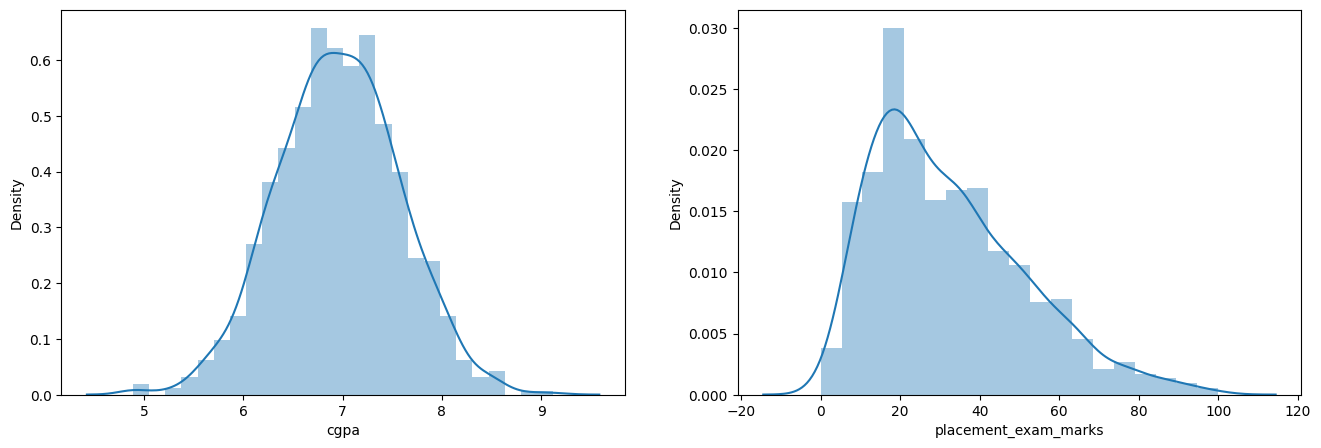

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [59]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [60]:
print('Mean of Cgpa: ', df['cgpa'].mean())
print('Std of Cgpa: ', df['cgpa'].std())
print('Min of Cgpa: ', df['cgpa'].min())
print('Max of Cgpa: ', df['cgpa'].max())

Mean of Cgpa:  6.96124
Std of Cgpa:  0.6158978751323894
Min of Cgpa:  4.89
Max of Cgpa:  9.12


## **1. By Calculating Highest and Lowest Values**

### **Step 1: Finding Boundry Values**

In [61]:
print('Highest allowed: ', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed: ', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed:  8.808933625397168
Lowest allowed:  5.113546374602832


### **Step 2: Finding the Outlier**

In [62]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### **Step 3: Trim the Outlier**

In [63]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [64]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


/tmp/ipython-input-1934105854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'])
/tmp/ipython-input-1934105854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


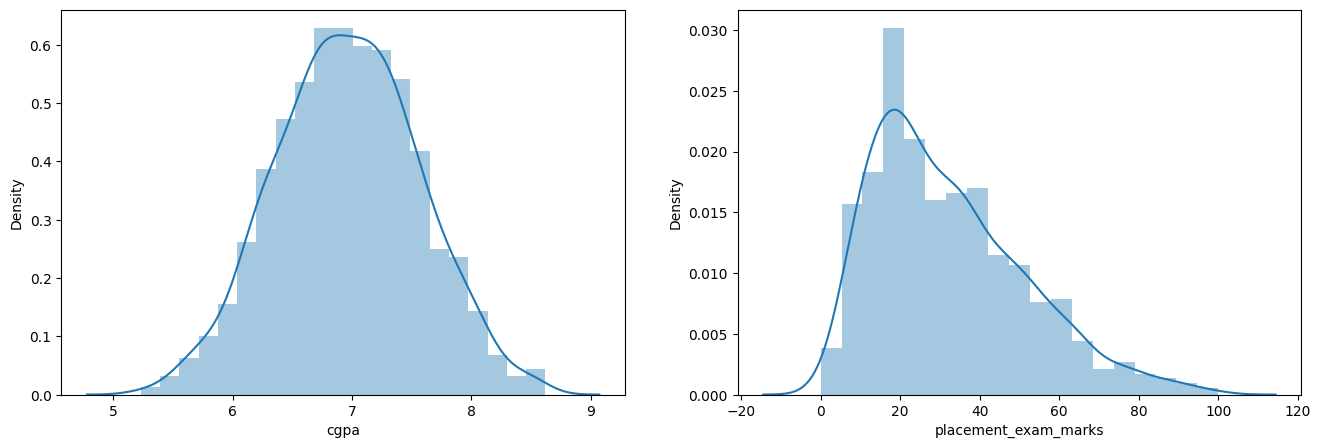

In [65]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(new_df['placement_exam_marks'])
plt.show()

## **2. By Calculating Z-Score**

### **Step 1: Calculate Z-Score of CGPA Column"**

In [66]:
df['z_score_cgpa'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std()

In [67]:
df

,cgpa,placement_exam_marks,placed,z_score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


### **Step 2: Select CGPA Score more than 3**

In [68]:
df[df['z_score_cgpa'] > 3]

,cgpa,placement_exam_marks,placed,z_score_cgpa
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


### **Step 3: Select CGPA Score less than -3**

In [69]:
df[df['z_score_cgpa'] < -3]

,cgpa,placement_exam_marks,placed,z_score_cgpa
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [70]:
df[(df['z_score_cgpa'] > 3) | (df['z_score_cgpa'] < -3)]

,cgpa,placement_exam_marks,placed,z_score_cgpa
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [71]:
new_df1 = df[(df['z_score_cgpa'] < 3) & (df['z_score_cgpa'] > -3)]

/tmp/ipython-input-3616212736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['z_score_cgpa'])
/tmp/ipython-input-3616212736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['placement_exam_marks'])


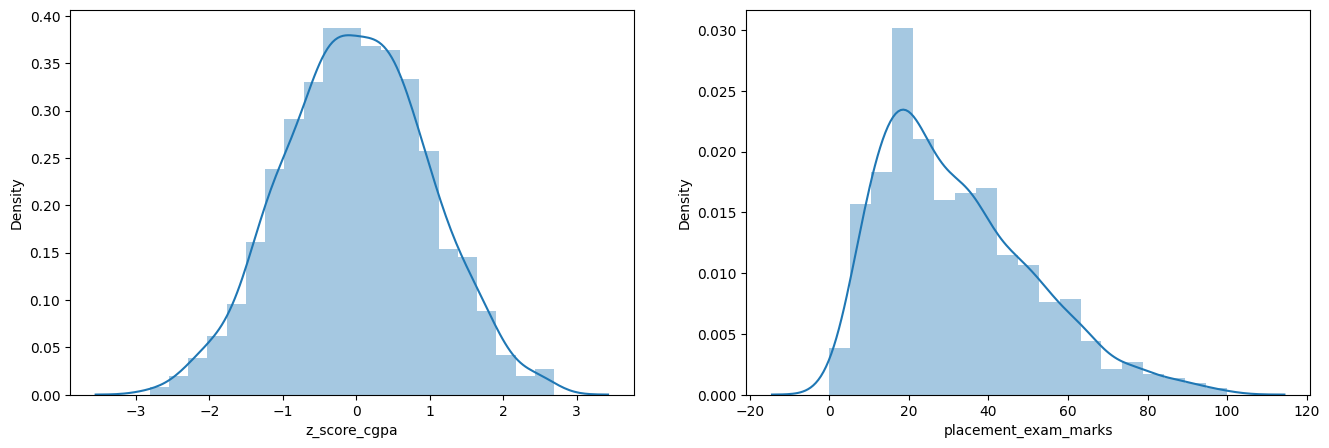

In [73]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df1['z_score_cgpa'])
plt.subplot(1,2,2)
sns.distplot(new_df1['placement_exam_marks'])
plt.show()